In [19]:
import numpy as np
import matplotlib.pyplot as plt

#### Génération d’un dataset (x, y) linéaire

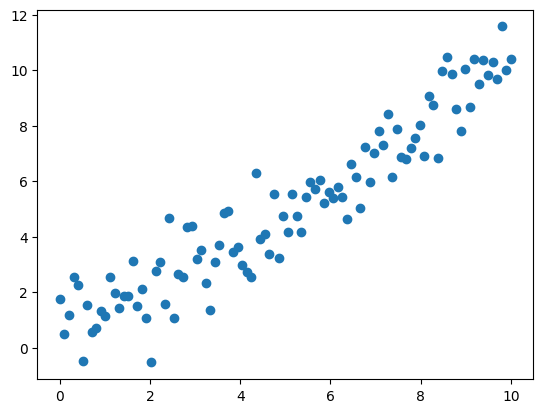

In [20]:

np.random.seed(0) # pour toujours reproduire le meme dataset
 
m= 100 # nombre d'echantillons a générer
x = np.linspace(0, 10, m).reshape((m, 1))
y = x + np.random.randn(m, 1)
 
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée
plt.show()

In [21]:

# ajout de la colonne de biais a X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
 


(100, 2)


In [22]:
# création d'un vecteur parametre theta
theta =  np.zeros((2,1)) # np.random.randn(2, 1) 
print(theta)

[[0.]
 [0.]]


#### Développement des fonctions de Descente de gradient

Implémenter les quatre fonctions clés:
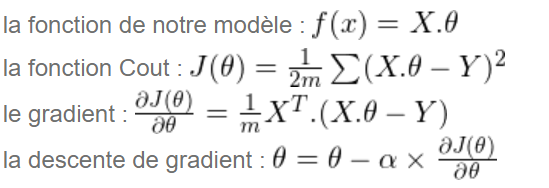

In [23]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
         
    return theta, cost_history

In [24]:
def model(X, theta):
    return X.dot(theta)
 
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
         
    return theta, cost_history

In [25]:
# Example de test :
print(cost_function(X, y, theta)) # pas d'erreur, retourne float, ~ 1000

17.30680574753189


#### Entrainement du modèle
indiquer le learning_rate et le nombre d'itérations

[[0.971034  ]
 [0.20337245]]


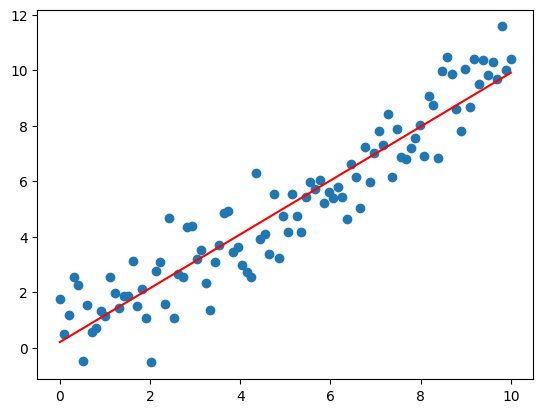

In [26]:
n_iterations = 1000
learning_rate = 0.01
 
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
 
print(theta_final) # voici les parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
 
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()

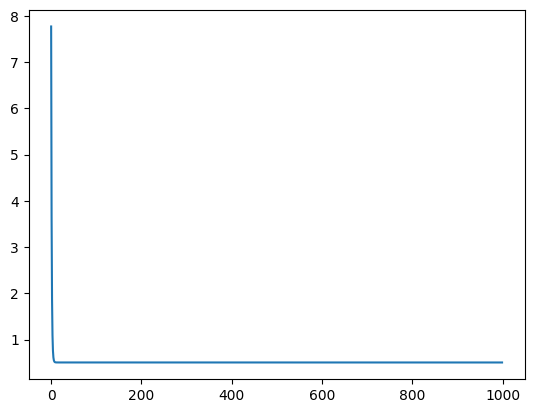

In [27]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [28]:
data = np.loadtxt("data.txt", delimiter = ",")

ValueError: could not convert string 'ï»¿1500' to float64 at row 0, column 1.

In [ ]:
X = data[:, 0]
Y = data[:, 1].reshape(X.size, 1)
X = np.vstack((np.ones((X.size, )), X)).T

In [ ]:
n_iterations = 100
learning_rate = 0.00000005
theta, cost_list = gradient_descent(X, Y, theta, learning_rate, n_iterations )


In [ ]:
new_houses = np.array([[1, 1547], [1, 1896], [1, 1934], [1,
2800], [1, 3400], [1, 5000]]) # le 1 ajouté dans toutes les lignes sert à garder le tetha_0
for house in new_houses :
    print("Prédiction pour une maison de surface ",
    house[1], "le prix est: $", model(house, theta))

Prédiction pour une maison de surface  1547 le prix est: $ [153759.00187626]
Prédiction pour une maison de surface  1896 le prix est: $ [188446.70345587]
Prédiction pour une maison de surface  1934 le prix est: $ [192223.58786855]
Prédiction pour une maison de surface  2800 le prix est: $ [278296.79579963]
Prédiction pour une maison de surface  3400 le prix est: $ [337931.81284195]
Prédiction pour une maison de surface  5000 le prix est: $ [496958.5249548]
